## Lab 8:  Clustering
Environmental justice (EJ) seeks to ensure that all communities, regardless of socioeconomic status or demographic background, have equal access to clean air, water, and, in the form of energy justice, access to renewable energy resources while minimizing exposure to environmental hazards. In this lab, we will apply clustering analysis to explore how U.S. counties group together based on renewable energy potential, demographic characteristics, and environmental risk factors.

The EEIP dataset was collated by the National Renewable Energy Lab (NREL) and contains a large set of features from multiple other databases including SLOPE (renewable energy potential) and EJSCREEN (environmental risk indicators).

Link to metadata: https://ucsb.box.com/s/x3olvh3rd8w5h7xz8jnm3v8g3t4ajjsg

First you will step through a guided clustering exploration of renewable energy production potential.  Then you will formulate a question of your own that brings in an environmental justice component.


### Step 0: Load Libraries and Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load the EEIP dataset 
eeip_data = pd.read_csv("/courses/EDS232/Data/eeip.data.csv")

## Part I:
In this part, we will step through an analysis that examines how US counties cluster in their potential production of renewable energy.  

### Step 1: Exploratory Data Analysis

First we need to check for missing data and remove incomplete rows. Since clustering is a distance-based technique, we also need to ensure that the features used for clustering are scaled appropriately to prevent dominant features from skewing results.  For our first analysis, use the following variables from the SLOPE dataset related to energy production potential as your features: 
- `utility_pv_technical_generation_potential_mwh`
- `residential_pv_technical_generation_potential_mwh`
- `land_based_wind_technical_generation_potential_mwh`
- `commercial_pv_technical_generation_potential_mwh`

*Information on these variables is available on line 7 of the ColumnsExplained tab of the metadata*

Once you have removed incomplete rows and scaled, print the shape of your processed dataframe. 

In [10]:
# Select the relevant energy production features
energy_features = [
    'utility_pv_technical_generation_potential_mwh',
    'residential_pv_technical_generation_potential_mwh',
    'land_based_wind_technical_generation_potential_mwh',
    'commercial_pv_technical_generation_potential_mwh'
]

# Remove rows with missing values in only the specified columns
eeip_data_cleaned = eeip_data.dropna(subset=energy_features)

# Standardize the data, scale it to have mean 0 and standard deviation 1
scaler = StandardScaler()
scaled_energy_data = scaler.fit_transform(eeip_data_cleaned[energy_features])

# Print the shape of the processed dataframe
print(f"Processed Data Shape: {eeip_data_cleaned.shape}")

Processed Data Shape: (3107, 152)


### Step 2: Hierarchical Clustering Analysis

Now that we have preprocessed our dataset and standardized the energy potential features, we will use hierarchical clustering to explore how counties group together based on their energy potential.

A dendrogram is a tree-like visualization that shows how clusters are merged step by step. By analyzing the dendrogram, we can decide the optimal number of clusters by looking at the distance between merges.

Use `linkage()` to perform the clustering.  Use 'ward' for the `method` parameter, a method which minimizes the variance within clusters, producing well-balanced groups. We will first visualize the **full dendrogram** using `dendrogram` before deciding on a truncation strategy.


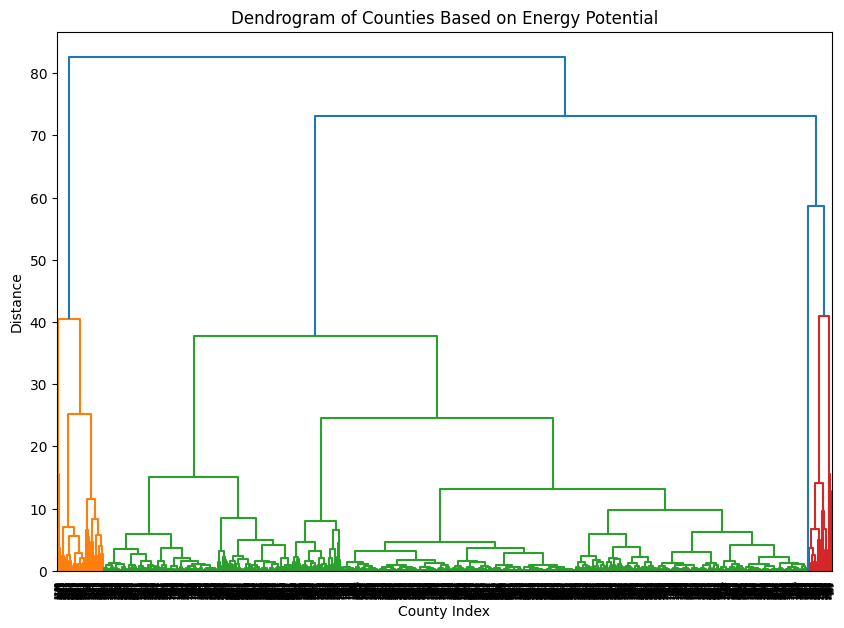

In [11]:
# Perform hierarchical clustering using 'ward' method
linked = linkage(scaled_energy_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram of Counties Based on Energy Potential")
plt.xlabel("County Index")
plt.ylabel("Distance")
plt.show()

### Step 3: Set Up Cluster Interpretation

After determining the optimal number of clusters from the dendrogram, we now assign each county to a cluster using the extracted cluster labels.

To better understand the clustering results, we will:
- Define `num_clusters` as the ideal number of clusters based on the dendrogram created above
- Extract cluster assignment attribute from the hierarchical clustering using `fcluster()` with `criterion = "maxclust"`
- Create a new variable `Cluster` in your cleaned dataframe and assign cluster labels to it
- Compute and print the mean values of the original energy potential features for each cluster.

This summary will help us interpret how counties differ in energy potential across clusters and inform possible next steps for analysis.


In [12]:
# Define the number of clusters
num_clusters = 4

# Extract cluster labels
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

# Add the cluster labels to the cleaned dataframe
eeip_data_cleaned['Cluster'] = cluster_labels

# Compute and print the mean values for each cluster
cluster_means = eeip_data_cleaned.groupby('Cluster')[energy_features].mean()
print(cluster_means)

         utility_pv_technical_generation_potential_mwh  \
Cluster                                                  
1                                         3.290819e+08   
2                                         4.943040e+07   
3                                         5.948022e+07   
4                                         5.245800e+06   

         residential_pv_technical_generation_potential_mwh  \
Cluster                                                      
1                                             8.433934e+04   
2                                             1.228932e+05   
3                                             2.138205e+06   
4                                             1.462565e+07   

         land_based_wind_technical_generation_potential_mwh  \
Cluster                                                       
1                                             5.422419e+07    
2                                             7.090613e+06    
3                         

/opt/python/3.7.13/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Step 4: Visualizing Energy Potential Across Clusters
Now that we have assigned cluster labels, we want to understand how energy potential differs across clusters. To do this, we will visualize these differences using a grouped bar chart.

Each bar should represent the mean value of an energy potential indicator for a specific cluster. These different patterns of potential is what caused the model to segregate the clusters in the way that it did.

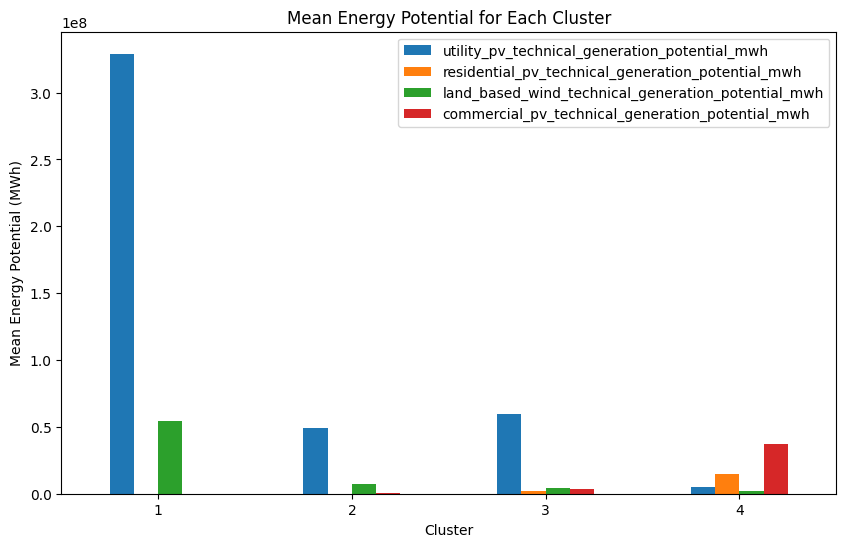

In [13]:
# Plotting the mean energy potential for each cluster
cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title("Mean Energy Potential for Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Energy Potential (MWh)")
plt.xticks(rotation=0)
plt.show()


### Step 5: Interpret Clustering Results
Interpret your plot of the resulting clusters.  How would you characterize and compare the four different clusters in terms of their profile of energy generation?

*** The bar chart shows how different clusters vary in terms of energy potential. Based on the clustering results, one cluster has high potential for a specific energy type, while the others have a more balanced mix of energy types. Cluster 1 has a higher potential for utility. ***

## Part II: Environmental Justice Metrics
Now it's your turn.

So far, we have clustered counties based on **energy potential**, but energy potential alone does not tell the full story of **energy equity and access**. To deepen the analysis, we need to consider environmental justice (EJ) factors that affect communities’ ability to benefit from renewable energy and the environmental burdens they already experience.

1. Explore EJSCREEN variables:  
   - The EJSCREEN subset of our dataset contains metrics on pollution burden, demographics (population size), and health risks (*lines 31-41 of the ColumnsExplained tab in the metadata sheet linked above*).
   - Identify 1-3 variables that could be important for energy equity analysis.  You could introduce them either as clustering features, as post-clustering variables to help interpret the clusters, or both. 

2. Modify the clustering approach:  
   - Add your selected EJSCREEN variables to our feature set.    
   - Re-run the hierarchical clustering analysis with the expanded dataset (if you added any as clustering features).  

3. Interpret the Results:
   Your interpretation could include considerations such as:
   - How do clusters change when EJSCREEN variables are included?  
   - Are counties with high renewable energy potential also burdened by environmental risks?  
   - What policy recommendations might emerge from these findings?  

In [16]:
print(eeip_data_cleaned.columns)
# List of columns that might be related to pollution or environmental risks
relevant_columns = [col for col in eeip_data_cleaned.columns if 'prox' in col or 'tsdf' in col or 'rmpprox' in col]
print(relevant_columns)

Index(['county_fips', 'county', 'state', 'county_pop',
       'utilitypv_techpot_quint',
       'utility_pv_technical_generation_potential_mwh',
       'residentialpv_techpot_quint',
       'residential_pv_technical_generation_potential_mwh',
       'landbasedwind_techpot_quint',
       'land_based_wind_technical_generation_potential_mwh',
       ...
       'rmpprox_3_prop', 'rmpprox_4_prop', 'rmpprox_5_prop', 'tsdf_indicator',
       'tsdfprox_1_prop', 'tsdfprox_2_prop', 'tsdfprox_3_prop',
       'tsdfprox_4_prop', 'tsdfprox_5_prop', 'Cluster'],
      dtype='object', length=153)
['trafficproxvol_1_prop', 'trafficproxvol_2_prop', 'trafficproxvol_3_prop', 'trafficproxvol_4_prop', 'trafficproxvol_5_prop', 'nplprox_1_prop', 'nplprox_2_prop', 'nplprox_3_prop', 'nplprox_4_prop', 'nplprox_5_prop', 'rmpprox_1_prop', 'rmpprox_2_prop', 'rmpprox_3_prop', 'rmpprox_4_prop', 'rmpprox_5_prop', 'tsdf_indicator', 'tsdfprox_1_prop', 'tsdfprox_2_prop', 'tsdfprox_3_prop', 'tsdfprox_4_prop', 'tsdfprox_5_p

In [1]:
# Select relevant EJSCREEN variables related to pollution burden and environmental risks
ej_screen_variables = [
    'trafficproxvol_1_prop',  # Proximity to high-traffic areas
    'nplprox_1_prop',         # Proximity to hazardous waste sites
    'tsdf_indicator'          # Proximity to Treatment, Storage, and Disposal Facilitie
]

# Combine the energy production potential features with the selected EJSCREEN variables
all_features = energy_features + ej_screen_variables

# Include county information 
all_features_with_county = ['county_fips', 'county'] + all_features

# Subset the cleaned dataset with the combined features and drop rows with any missing values
eeip_data_ej = eeip_data_cleaned[all_features_with_county].dropna()

# Separate county identifiers from the features to standardize only the numeric data
eeip_data_ej_no_county = eeip_data_ej.drop(columns=['county_fips', 'county'])

# Standardize the combined dataset 
scaler = StandardScaler()
scaled_ej_data = scaler.fit_transform(eeip_data_ej_no_county)

# Perform hierarchical clustering on the standardized data
linked_ej = linkage(scaled_ej_data, method='ward')

# Plot the dendrogram to visualize clustering
plt.figure(figsize=(10, 7))
dendrogram(linked_ej)
plt.title("Dendrogram with EJSCREEN Variables")
plt.xlabel("County Index")
plt.ylabel("Distance")
plt.show()

# Define the number of clusters 
num_clusters = 4

# Extract cluster labels
cluster_labels = fcluster(linked_ej, num_clusters, criterion='maxclust')

# Add the cluster labels to the cleaned dataframe
eeip_data_ej['Cluster'] = cluster_labels

# Compute and print the mean values for each cluster 
cluster_means = eeip_data_ej.groupby('Cluster')[energy_features].mean()
print(cluster_means)

# Include counties for easier interpretation
county_clusters = eeip_data_ej[['county_fips', 'county', 'Cluster']]

# Print the first few rows of the county and cluster assignment for verification
print(county_clusters.head())

# Plotting the mean energy potential for each cluster
cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title("Mean Energy Potential for Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Energy Potential (MWh)")
plt.xticks(rotation=0)
plt.show()


NameError: name 'energy_features' is not defined

I added proximity to high traffic areas, proximity to hazardous waste sites, and proximity to treatment, storage, and disposal facilities. I chose these because I wanted to look at the difference with these variables, because these variables are of specific proximities to locations that use up alot of energy and are polluters. Cluster 2 seems to have the highest potential for utility. 

Which EJSCREEN variable(s) did you add to the analysis? Why did you choose these?  What is the question you are interested in? What did you learn from the analysis

*** ***